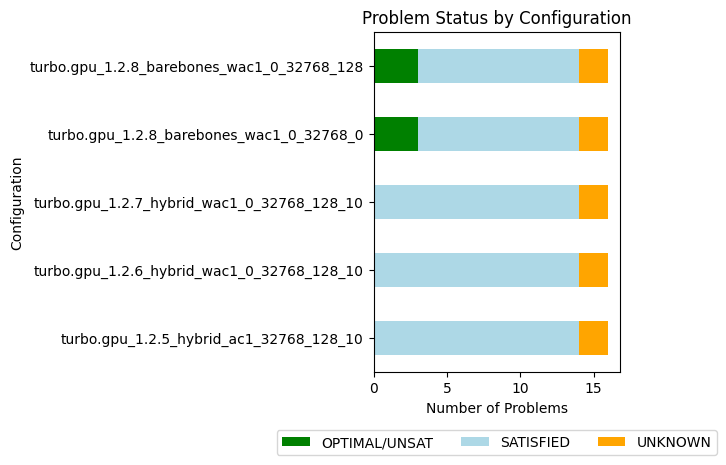

,uid,version,machine,short_uid,avg_nodes_per_second,median_nodes_per_second,avg_normalized_nodes_per_second,best_nodes_per_second,avg_deductions_per_node,median_deductions_per_node,avg_normalized_deductions_per_node,median_normalized_deductions_per_node,best_deductions_per_node,avg_deductions_per_second,median_deductions_per_second,avg_normalized_deductions_per_second,median_normalized_deductions_per_second,best_deductions_per_second,avg_fp_iterations_per_second,median_fp_iterations_per_second,avg_normalized_fp_iterations_per_second,best_fp_iterations_per_second,avg_fp_iterations,median_fp_iterations,avg_normalized_fp_iterations,best_fp_iterations,avg_propagator_mem_mb,median_propagator_mem_mb,avg_normalized_propagator_mem_mb,best_propagator_mem_mb,avg_store_mem_kb,avg_normalized_store_mem_kb,best_store_mem_kb,median_store_mem_kb,problem_optimal,problem_sat,problem_unknown,problem_with_store_shared,problem_with_props_shared,idle_eps_workers
3,turbo.gpu.release_1.2.8_precision5820_300s_barebones_wac1_0_32768_0,1.2.8,precision5820,turbo.gpu_1.2.8_barebones_wac1_0_32768_0,262153.550367,43555.095985,0.0,0,8.231421e+05,191625.764781,0.0,0.0,16,1.175169e+10,1.373727e+10,0.0,0.0,16,1.925882e+06,502630.005225,0.0,0,14.948814,9.313642,0.0,16,0.644475,0.249864,0.0,16,288.3995,0.0,16,89.056,3,11,2,1,0,1
4,turbo.gpu.release_1.2.8_precision5820_300s_barebones_wac1_0_32768_128,1.2.8,precision5820,turbo.gpu_1.2.8_barebones_wac1_0_32768_128,211302.317297,34413.658507,0.0,0,8.151182e+05,185548.132742,0.0,0.0,16,9.639312e+09,1.070739e+10,0.0,0.0,16,1.541334e+06,437091.947713,0.0,0,14.520342,9.287430,0.0,16,0.644475,0.249864,0.0,16,288.3995,0.0,16,89.056,3,11,2,2,0,1
2,turbo.gpu.release_1.2.7_precision5820_300s_hybrid_wac1_0_32768_128_10,1.2.7,precision5820,turbo.gpu_1.2.7_hybrid_wac1_0_32768_128_10,46886.518427,28322.514737,0.0,0,8.128980e+05,219665.789991,0.0,0.0,16,6.813373e+09,6.812761e+09,0.0,0.0,16,4.435486e+05,326175.736870,0.0,0,14.986715,10.232742,0.0,16,0.644472,0.249860,0.0,16,288.3840,0.0,16,89.040,0,14,2,6,0,2
1,turbo.gpu.release_1.2.6_precision5820_300s_hybrid_wac1_0_32768_128_10,1.2.6,precision5820,turbo.gpu_1.2.6_hybrid_wac1_0_32768_128_10,39881.907458,22466.704551,0.0,0,1.117197e+06,319343.766900,0.0,0.0,16,7.667794e+09,9.018995e+09,0.0,0.0,16,4.651369e+05,270480.103737,0.0,0,17.068471,11.711558,0.0,16,0.855273,0.422844,0.0,16,403.2485,0.0,16,208.948,0,14,2,3,0,2
0,turbo.gpu.release_1.2.5_precision5820_300s_hybrid_ac1_32768_128_10,1.2.5,precision5820,turbo.gpu_1.2.5_hybrid_ac1_32768_128_10,38006.316196,17792.802319,0.0,0,2.608042e+06,467082.402630,0.0,0.0,16,9.009848e+09,1.022741e+10,0.0,0.0,16,9.178486e+05,455685.374144,0.0,0,40.507284,23.834476,0.0,16,0.855273,0.422844,0.0,16,403.2485,0.0,16,208.948,0,14,2,3,0,2


| short_uid                                  |   avg_nodes_per_second |   problem_optimal |   problem_sat |   problem_unknown |
|:-------------------------------------------|-----------------------:|------------------:|--------------:|------------------:|
| turbo.gpu_1.2.8_barebones_wac1_0_32768_0   |               262154   |                 3 |            11 |                 2 |
| turbo.gpu_1.2.8_barebones_wac1_0_32768_128 |               211302   |                 3 |            11 |                 2 |
| turbo.gpu_1.2.7_hybrid_wac1_0_32768_128_10 |                46886.5 |                 0 |            14 |                 2 |
| turbo.gpu_1.2.6_hybrid_wac1_0_32768_128_10 |                39881.9 |                 0 |            14 |                 2 |
| turbo.gpu_1.2.5_hybrid_ac1_32768_128_10    |                38006.3 |                 0 |            14 |                 2 |


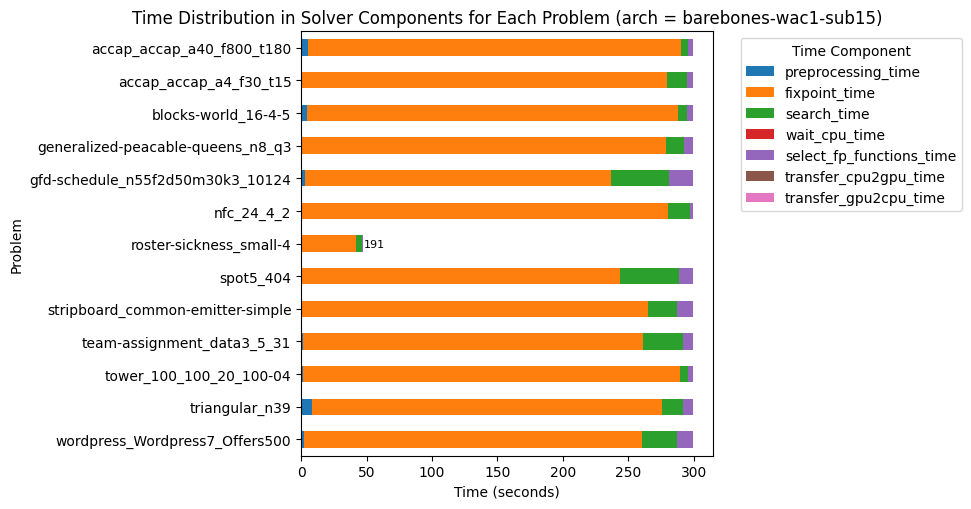

| Metrics | Normalized average [0,100] | Δ v1.2.7 | #best (_/16) | Average | Δ v1.2.7 | Median | Δ v1.2.7 |
|---------|----------------------------|----------|--------------|---------|----------|--------|----------|
| Nodes per second | 99.87 | +49% | 15 | 211302.32 | +351% | 34413.66 | +22% |
| Deductions per node | 95.80 | -3% | 9 | 815118.16 | 0% | 185548.13 | -16% |
| Fixpoint iterations per second | 99.97 | +47% | 15 | 1541334.10 | +248% | 437091.95 | +34% |
| Fixpoint iterations per node | 96.45 | -2% | 9 | 14.52 | -3% | 9.29 | -9% |
| Propagators memory | 99.99 | 0% | 9 | 0.64MB | 0% | 0.25MB | 0% |
| Variables store memory | 100.00 | 0% | 0 | 288.40KB | 0% | 89.06KB | 0% |

| Metrics | Count | Δ v1.2.7 |
|---------|-------|----------|
| #Problems at optimality | 3 | 0 | 
| #Problems satisfiable | 11 | 14  |
| #Problems unknown | 2 | 2  |
| #Problem with store in shared memory | 2 | 6  |
| #Problem with prop in shared memory | 0 | 0  |
| #Problems with IDLE SMs at timeout | 1 | 

In [25]:
import importlib
import analysis
from IPython.display import HTML, display
import pandas as pd

importlib.reload(analysis)

pd.options.mode.copy_on_write = True

df = analysis.read_experiments([
  # "../campaign/precision5820/com.google.ortools.sat-v9.9.csv",
  # "../campaign/precision5820/com.google.ortools.sat.noglobal-v9.9.csv",
  # "../campaign/precision5820/com.google.ortools.sat-v9.9-par.csv",
  # "../campaign/precision5820/org.choco.choco-v4.10.15-java11.csv",
  # "../campaign/precision5820/org.choco.choco-v4.10.15-par-java11.csv",
  # "../campaign/precision5820/org.choco.choco-v4.10.15.csv",
  # "../campaign/precision5820/org.choco.choco-v4.10.15-par.csv",
  # "../campaign/precision5820/turbo.gpu.release-v1.1.7-A5000.csv",
  # "../campaign/precision5820/turbo.cpu.release-v1.2.0.csv",
  # "../campaign/precision5820/turbo.gpu.release-v1.2.0.csv",
  # "../campaign/precision5820/turbo.gpu.release-v1.2.1.csv",
  # "../campaign/precision5820/turbo.gpu.release-v1.2.2.csv",
  # "../campaign/precision5820/turbo.gpu.release-v1.2.3.csv",
  # "../campaign/helios/turbo.gpu.release-v1.2.2.csv",
  # "../campaign/helios/turbo.gpu.release-v1.2.3.csv",
  # "../campaign/precision5820/turbo.gpu.release-v1.2.4.csv",
  # "../campaign/precision5820/turbo.gpu.release-v1.2.5.csv",
  "../campaign/precision5820/turbo.gpu.release-v1.2.5-mzn2022-short.csv",
  "../campaign/precision5820/turbo.gpu.release-v1.2.6-mzn2022-short.csv",
  "../campaign/precision5820/turbo.gpu.release-v1.2.7-mzn2022-short.csv",
  "../campaign/precision5820/turbo.gpu.release-v1.2.8-mzn2022-short.csv",
  # "../campaign/helios/turbo.gpu.release-v1.2.3.csv",
  # "../campaign/helios/turbo.gpu.release-v1.2.4.csv",
  # "../campaign/helios/turbo.gpu.release-v1.2.5.csv",
  # "../campaign/helios/turbo.gpu.release-v1.2.6.csv",
  # "../campaign/helios/turbo.gpu.release-v1.2.7-mzn2024.csv",
  # "../campaign/helios/turbo.gpu.release-v1.2.8-mzn2024.csv"
  # "../campaign/aion/org.choco.choco-v4.10.18-mzn2024.csv",
  # "../campaign/aion/com.google.ortools.sat-v9.9.csv"
  # "../campaign/iris/turbo.gpu.release-v1.2.4.csv",
  # "../campaign/precision7750/turbo.cpu.release-v1.2.6-analysis.csv"
  # "../campaign/aion/turbo.cpu.release-v1.2.7-mzn2024-analysis.csv"
  # "../campaign/precision7750/turbo.gpu.release-v1.2.7.csv"
  # "../campaign/precision5820/turbo.cpu.release-v1.2.4.csv"
])

# df.to_csv("test.csv", index=False)
# df = df[~(df['problem'] == "rcpsp")]
# df = df[df['problem'] == "rcpsp"]

# Because globalmem was only benchmarked on problems that could fit in shared memory.
# But we don't want to remove the others for most of the analysis. (comment the line if you want to analyse the globalmem results)
df = df[df['uid'] != "turbo.gpu.release_1.2.0_precision5820_300s_gpu_4096_64_globalmem"]
# df = df[df['uid'] != "turbo.gpu.release_1.2.7_helios_1200s_hybrid_wac1_4096_32768_132_72"]

# df = df[df['short_uid'] != "turbo.gpu_1.2.7_hybrid_ac1_32768_132_72_disable_simplify_ipc"]
# df = df[df['short_uid'] != "turbo.gpu_1.2.7_hybrid_ac1_32768_132_72_disable_simplify"]
# df = df[df['short_uid'] != "turbo.gpu_1.2.7_hybrid_ac1_32768_132_72_force_ternarize_ipc"]
# df = df[df['short_uid'] != "turbo.gpu_1.2.8_barebones_wac1_4096_32768_0_no_pr"]

# mzn_challenge = pd.read_csv("../benchmarking/mzn2024_noset.csv")
mzn_challenge = pd.read_csv("../benchmarking/short.csv")
mzn_challenge['model_data_file'] = mzn_challenge['model'] + ' - ' + mzn_challenge['data_file']
# print(mzn_challenge)
mzn_data = set(mzn_challenge['model_data_file'])
df = df[df['model_data_file'].isin(mzn_data)]

df = analysis.intersect(df)

# df = df[df['timeout_ms'] == 1200000]

# print(df[df['preprocessing_time'] >= 1200])

analysis.plot_overall_result(df)
# display(HTML(analysis.metrics_table(df[df['mzn_solver'].str.startswith("turbo")]).to_html()))
metrics = analysis.metrics_table(df)
display(HTML(metrics.to_html()))
# print(metrics[metrics['short_uid'] != "turbo.gpu_1.2.7_hybrid_wac1_4096_32768_264_72"][['short_uid', 'avg_nodes_per_second','median_nodes_per_second','avg_fp_iterations_per_second','median_fp_iterations_per_second', 'avg_propagator_mem_mb', 'median_propagator_mem_mb', 'avg_store_mem_kb', 'median_store_mem_kb', 'problem_with_store_shared', 'problem_with_props_shared']].T.to_latex(index=True))

sorted_metrics = metrics.sort_values(by=['problem_optimal', 'problem_sat', 'avg_nodes_per_second', 'version'], ascending=[False, False, False, True])
print(sorted_metrics[['short_uid','avg_nodes_per_second','problem_optimal', 'problem_sat', 'problem_unknown']].to_markdown(index=False))
# print(sorted_metrics[['short_uid','problem_optimal', 'problem_sat', 'problem_unknown']].to_latex(index=False))

# analysis.plot_time_distribution("barebones-wac1-sub15", df[df['uid'] == "turbo.gpu.release_1.2.8_helios_1200s_barebones_wac1_0_32768_0_no_pr"])
analysis.plot_time_distribution("barebones-wac1-sub15", df[df['uid'] == "turbo.gpu.release_1.2.8_precision5820_300s_barebones_wac1_0_32768_0"])

analysis.comparison_table_md(df, "turbo.gpu.release_1.2.7_precision5820_300s_hybrid_wac1_0_32768_128_10",  "turbo.gpu.release_1.2.8_precision5820_300s_barebones_wac1_0_32768_128")
analysis.comparison_table_md(df, "turbo.gpu.release_1.2.7_precision5820_300s_hybrid_wac1_0_32768_128_10",  "turbo.gpu.release_1.2.8_precision5820_300s_barebones_wac1_0_32768_0")

# print(analysis.list_problem_where_leq(df, "nodes", "turbo.gpu.release_1.2.0_precision5820_300s_4096_64_256", "turbo.gpu.release_1.2.1_precision5820_300s_4096_64_1024"))

# p = analysis.compare_solvers_pie_chart(df, "turbo.gpu.release_1.2.8_helios_1200s_barebones_wac1_0_32768_0_no_pr", "turbo.gpu.release_1.2.8_helios_1200s_barebones_ac1_32768_0_no_pr", "TCN-WAC1-0-NO-PR", "TNC-AC1-NO-PR")

# p = analysis.compare_solvers_pie_chart(df, "turbo.gpu.release_1.2.8_helios_1200s_barebones_wac1_0_32768_0_no_pr", "org.choco.choco_4.10.18_aion_1200s", "TCN-WAC1-0-NO-PR", "Choco")
# p = analysis.compare_solvers_pie_chart(df, "turbo.gpu.release_1.2.8_helios_1200s_barebones_wac1_0_32768_0_no_pr", "com.google.ortools.sat_9.9_aion_1200s", "TCN-WAC1-0-NO-PR", "OR-Tools")
# p = analysis.compare_solvers_pie_chart(df, "turbo.gpu.release_1.2.8_helios_1200s_barebones_wac1_0_32768_0_no_pr", "org.choco.choco_4.10.18_aion_1200s_free", "TCN-WAC1-0-NO-PR", "Choco (free)")
# p = analysis.compare_solvers_pie_chart(df, "turbo.gpu.release_1.2.8_helios_1200s_barebones_wac1_0_32768_0_no_pr", "org.choco.choco_4.10.18_aion_1200s_64threads_64cores", "TCN-WAC1-0-NO-PR", "Choco (64 threads)")
# p = analysis.compare_solvers_pie_chart(df, "turbo.gpu.release_1.2.8_helios_1200s_barebones_wac1_0_32768_0_no_pr", "com.google.ortools.sat_9.9_aion_1200s_64threads_64cores", "TCN-WAC1-0-NO-PR", "OR-Tools (64 threads)")


# p = analysis.compare_solvers_pie_chart(df, "turbo.gpu.release_1.2.8_helios_1200s_barebones_wac1_4096_32768_0", "org.choco.choco_4.10.18_aion_1200s", "TCN", "Choco")
# p = analysis.compare_solvers_pie_chart(df, "turbo.gpu.release_1.2.8_helios_1200s_barebones_wac1_4096_32768_0_no_pr", "org.choco.choco_4.10.18_aion_1200s", "TCN-WAC1-4096-NO-PR", "Choco")

# print(p[p['Comparison'] == 'Error'])
# p = analysis.compare_solvers_pie_chart(df, "turbo.gpu.release_1.2.8_helios_1200s_barebones_wac1_4096_32768_0", "org.choco.choco_4.10.18_aion_1200s_free", "TCN1.2.8", "Choco (free)")
# p = analysis.compare_solvers_pie_chart(df, "turbo.gpu.release_1.2.8_helios_1200s_barebones_wac1_4096_32768_0", "org.choco.choco_4.10.18_aion_1200s_64threads_64cores", "TCN1.2.8", "Choco (64 threads)")
# p = analysis.compare_solvers_pie_chart(df, "turbo.gpu.release_1.2.7_helios_1200s_hybrid_wac1_4096_32768_264_72", "org.choco.choco_4.10.18_aion_1200s_64threads_64cores")

# p = analysis.compare_solvers_pie_chart(df, "turbo.gpu.release_1.2.8_helios_1200s_barebones_wac1_4096_32768_0", "com.google.ortools.sat_9.9_aion_1200s", "TCN1.2.8", "OR-Tools")
# p = analysis.compare_solvers_pie_chart(df, "turbo.gpu.release_1.2.8_helios_1200s_barebones_wac1_4096_32768_0", "com.google.ortools.sat_9.9_aion_1200s_64threads_64cores", "TCN1.2.8", "OR-Tools (64 threads)")
# p = analysis.compare_solvers_pie_chart(df, "turbo.gpu.release_1.2.6_helios_1200s_hybrid_wac1_4096_32768_264_72", "turbo.gpu.release_1.2.6_helios_1200s_hybrid_wac1_4096_131072_264_72")
# print(p[p['Comparison'] == 'Error'])
# print(p[p['Comparison'] == 'turbo.gpu.release_1.2.5_precision5820_300s_hybrid_ac1_4096_128_10 better'])
